## Classification KNN TRAIN NO OUTLIERS CITYBLOCK

### Libraries

In [1]:
# !pip install scikit-plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
os.environ["OMP_NUM_THREADS"] = "8"

In [2]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

### Data preprocessing

In [3]:
df = pd.read_csv("no_outlier.csv")
#test = pd.read_csv("test_cleaned.csv")

In [4]:
df = df.replace({"explicit": {False:0, True:1}})
#test = test.replace({"explicit": {False:0, True:1}})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13144 entries, 0 to 13143
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              13144 non-null  object 
 1   duration_ms       13144 non-null  int64  
 2   explicit          13144 non-null  int64  
 3   popularity        13144 non-null  int64  
 4   artists           13144 non-null  object 
 5   album_name        13144 non-null  object 
 6   danceability      13144 non-null  float64
 7   energy            13144 non-null  float64
 8   key               13144 non-null  int64  
 9   loudness          13144 non-null  float64
 10  speechiness       13144 non-null  float64
 11  acousticness      13144 non-null  float64
 12  instrumentalness  13144 non-null  float64
 13  liveness          13144 non-null  float64
 14  valence           13144 non-null  float64
 15  tempo             13144 non-null  float64
 16  time_signature    13144 non-null  float6

In [6]:
#test.info()

### Preparing the training and test data

In [7]:
X = df.iloc[:, [1,2,6,7,8,9,10,11,12,13,14,15,16]].values
y = np.array(df.iloc[:, [17]].values)

In [8]:
np.unique(y, return_counts=True)

(array(['afrobeat', 'black-metal', 'bluegrass', 'brazil', 'breakbeat',
        'chicago-house', 'disney', 'forro', 'happy', 'idm', 'indian',
        'industrial', 'iranian', 'j-dance', 'j-idol', 'mandopop', 'sleep',
        'spanish', 'study', 'techno'], dtype=object),
 array([679, 693, 711, 591, 689, 718, 666, 708, 653, 678, 701, 697, 629,
        457, 731, 738, 362, 638, 686, 719], dtype=int64))

np.unique(y_val, return_counts=True)

## Partitioning

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
random_state = 0

In [11]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.333333333333333333, stratify=y, random_state=random_state
)

In [12]:
#with stratify
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_val, return_counts=True)[1] / len(y_val))

[0.05165855 0.05272368 0.05409312 0.04496348 0.05241935 0.05462568
 0.05066951 0.05386488 0.04968046 0.05158247 0.05333232 0.053028
 0.04785453 0.03476872 0.05561473 0.05614729 0.02754108 0.04853926
 0.05219111 0.05470177]
[0.05170052 0.05272769 0.05409724 0.0449669  0.0523853  0.05466788
 0.05067336 0.05386898 0.0496462  0.0515864  0.05329833 0.05307008
 0.04782013 0.0348094  0.05558092 0.05615156 0.02761927 0.04850491
 0.05215704 0.05466788]
[0.05157462 0.05271565 0.05408489 0.04495664 0.05248745 0.05454131
 0.0506618  0.05385669 0.04974897 0.05157462 0.05340027 0.05294386
 0.04792332 0.03468736 0.05568234 0.05613875 0.02738476 0.04860794
 0.05225924 0.05476951]


In [13]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(8762, 13) (4382, 13) (8762, 1) (4382, 1)


## Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
norm = MinMaxScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_val_norm = norm.transform(X_val)

## Classifiers
Classifiers usually have a:
- `fit` method to train them on training data
- `predict` method to validate/test them on validation/test data

## KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
y_train = np.ravel(y_train)
y_val = np.ravel(y_val)

In [18]:
clf = KNeighborsClassifier(n_neighbors=24, metric="cityblock", weights="distance")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='cityblock', n_neighbors=24, weights='distance')

In [19]:
import warnings

# To suppress all warnings (not recommended)
warnings.filterwarnings("ignore")

In [20]:
# predict: Predict the class labels for the provided data.
y_val_pred = clf.predict(X_val_norm)
y_val_pred

array(['mandopop', 'afrobeat', 'mandopop', ..., 'indian', 'industrial',
       'study'], dtype=object)

In [21]:
# y_test contains the target labels 
y_val

array(['indian', 'afrobeat', 'bluegrass', ..., 'spanish', 'happy',
       'study'], dtype=object)

In [22]:
print("Accuracy:", accuracy_score(y_val, y_val_pred))

Accuracy: 0.42834322227293475


In [23]:
# score: Return the mean accuracy on the given test data and labels.
clf.score(X_val_norm, y_val)

0.42834322227293475

In [24]:
# KNeighborsClassifier.score is doing this
(y_val_pred == y_val).sum() / len(y_val)

0.42834322227293475

#### Performance evaluation

In [25]:
# print("F1:", f1_score(y_test, y_test_pred))

In [26]:
print("F1:", f1_score(y_val, y_val_pred, average="macro"))

F1: 0.41280229387859624


In [27]:
print("F1:", f1_score(y_val, y_val_pred, average="micro"))

F1: 0.42834322227293475


In [28]:
print("F1:", f1_score(y_val, y_val_pred, labels=['black-metal'], average="micro"))

F1: 0.6252354048964218


In [29]:
print("F1:", f1_score(y_val, y_val_pred, labels=['sleep'], average="macro"))

F1: 0.608695652173913


In [30]:
print(classification_report(y_val, y_val_pred))

               precision    recall  f1-score   support

     afrobeat       0.39      0.18      0.25       226
  black-metal       0.55      0.72      0.63       231
    bluegrass       0.44      0.50      0.47       237
       brazil       0.36      0.16      0.22       197
    breakbeat       0.34      0.22      0.26       230
chicago-house       0.48      0.53      0.50       239
       disney       0.51      0.47      0.49       222
        forro       0.53      0.62      0.57       236
        happy       0.38      0.36      0.37       218
          idm       0.46      0.19      0.26       226
       indian       0.35      0.24      0.28       234
   industrial       0.28      0.34      0.31       232
      iranian       0.60      0.31      0.41       210
      j-dance       0.38      0.40      0.39       152
       j-idol       0.38      0.69      0.49       244
     mandopop       0.33      0.68      0.44       246
        sleep       0.88      0.47      0.61       120
      spa

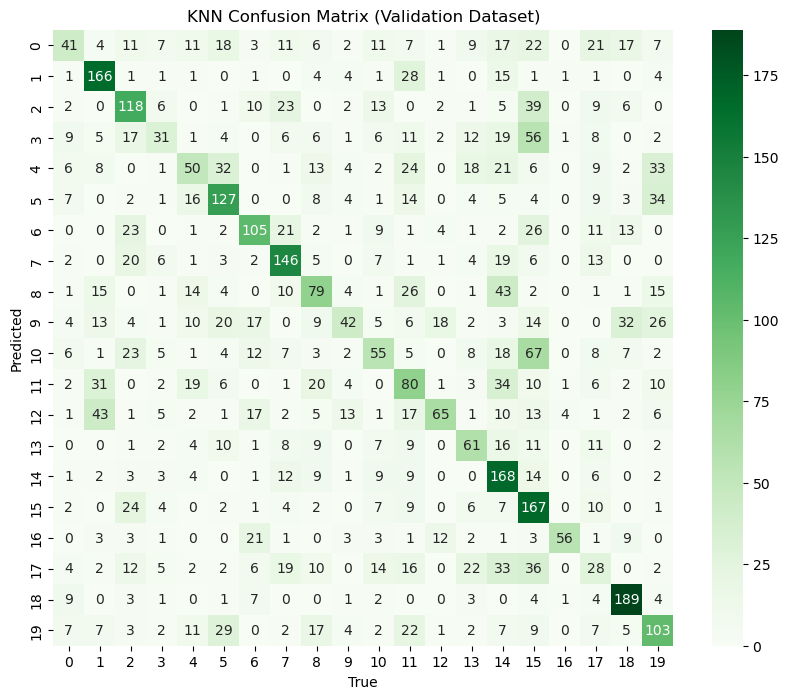

In [31]:
cf = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(10, 8))
plt.title("KNN Confusion Matrix (Validation Dataset)")
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')
plt.xlabel("True")
plt.ylabel("Predicted")
#plt.savefig('Confusion Matrix VAL Genre cityblock.png')
plt.show()

In [32]:
# Return probability estimates for the test data X.
y_val_pred_proba = clf.predict_proba(X_val_norm)

y_val_pred_proba[0:10]

array([[0.        , 0.        , 0.03829829, 0.13970423, 0.        ,
        0.11918108, 0.        , 0.04192371, 0.03972791, 0.        ,
        0.08234765, 0.        , 0.        , 0.        , 0.03749113,
        0.24660813, 0.        , 0.17952719, 0.        , 0.07519069],
       [0.39385639, 0.        , 0.14736672, 0.        , 0.        ,
        0.        , 0.        , 0.07218443, 0.        , 0.        ,
        0.12859279, 0.07292255, 0.        , 0.03796513, 0.11045295,
        0.03665904, 0.        , 0.        , 0.        , 0.        ],
       [0.05957639, 0.        , 0.08300661, 0.11965482, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.12405378, 0.        , 0.04484353, 0.        , 0.03961126,
        0.49296389, 0.        , 0.        , 0.        , 0.03628972],
       [0.04041672, 0.        , 0.15003054, 0.04022611, 0.        ,
        0.        , 0.10461266, 0.1217776 , 0.        , 0.        ,
        0.09311269, 0.        , 0.        , 0

In [33]:
y_val_pred[11:21]

array(['j-dance', 'breakbeat', 'happy', 'bluegrass', 'disney',
       'bluegrass', 'indian', 'j-idol', 'forro', 'j-idol'], dtype=object)

In [34]:
y_val_pred[0:10]

array(['mandopop', 'afrobeat', 'mandopop', 'spanish', 'forro', 'techno',
       'study', 'j-dance', 'j-idol', 'j-dance'], dtype=object)

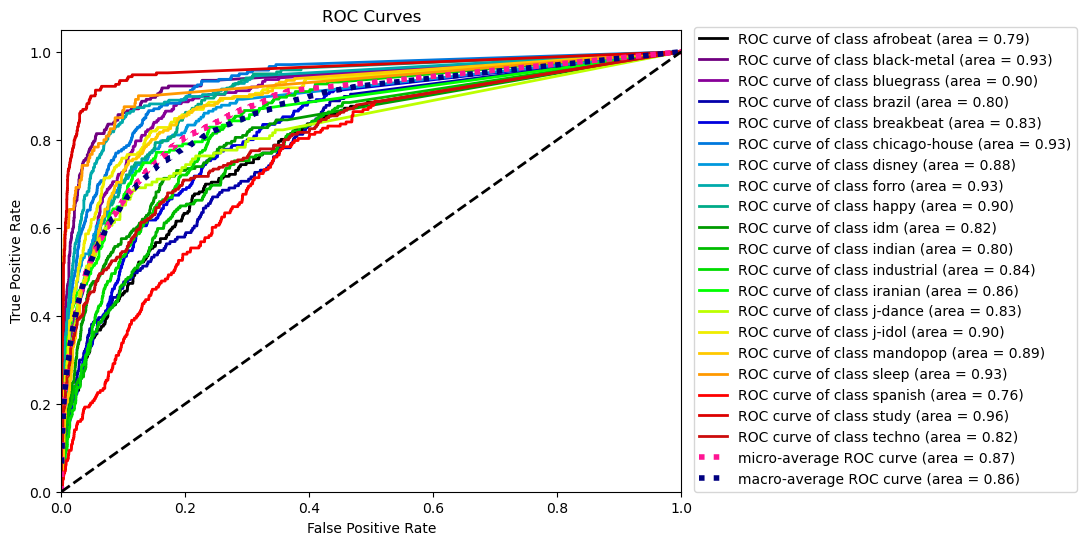

In [35]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

plot_roc(y_val, y_val_pred_proba, figsize=(8,6))
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)

plt.show()

In [36]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
roc_auc_score(y_val, y_val_pred_proba, multi_class="ovr", average="macro")

0.8646564175279268

In [37]:
roc_auc_score(y_val, y_val_pred_proba, multi_class="ovr", average="micro")

0.8724814708534854

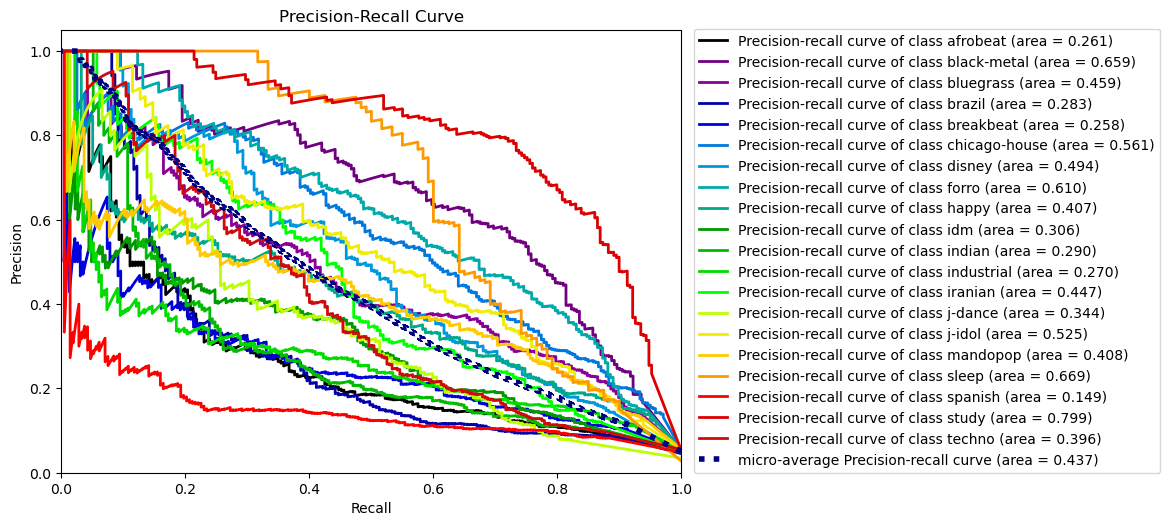

In [38]:
plot_precision_recall(y_val, y_val_pred_proba, figsize=(8,5.75))
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)

plt.show()

#### Repeated Holdout

In [39]:
N = 50
err = 0

for i in range(N):
    # stratified holdout
    X_rh_train, X_rh_val, y_rh_train, y_rh_val = train_test_split(X, y, test_size=0.333333333333333333, stratify=y)
    
    # normalize train set
    norm.fit(X_rh_train)
    X_rh_train_norm = norm.transform(X_rh_train)
    X_rh_val_norm = norm.transform(X_rh_val)

    # initialize and fit classifier
    clf = KNeighborsClassifier(n_neighbors=24, metric="cityblock", weights="distance")
    clf.fit(X_rh_train_norm, y_rh_train)

    # computing error
    acc = clf.score(X_rh_val_norm, y_rh_val)
    err += 1 - acc

print("Overall error estimate:", err/N)

Overall error estimate: 0.5807074395253311


#### Cross-validation
https://scikit-learn.org/stable/modules/cross_validation.html

In [40]:
from sklearn.model_selection import cross_val_score
k = 10

In [41]:
# initialize classifier
clf = KNeighborsClassifier(n_neighbors=24, metric="cityblock", weights="distance")

scores = cross_val_score(clf, X_train_norm, y_train, cv=k)
scores

array([0.43329532, 0.40706956, 0.41438356, 0.41210046, 0.39155251,
       0.43949772, 0.38013699, 0.39954338, 0.41666667, 0.4109589 ])

In [42]:
print("Overall error estimate:", 1 - scores.mean())

Overall error estimate: 0.5894794937077938


In [43]:
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std()))

Accuracy: 0.4105 (+/- 0.02)


In [44]:
# scoring default is accuracy
cross_val_score(clf, X_train_norm, y_train, cv=k, scoring='f1_macro')

array([0.42083553, 0.39289641, 0.39477924, 0.39906906, 0.37204185,
       0.42294767, 0.35595829, 0.38867477, 0.39681731, 0.39447555])

### Hyperparameters Tuning

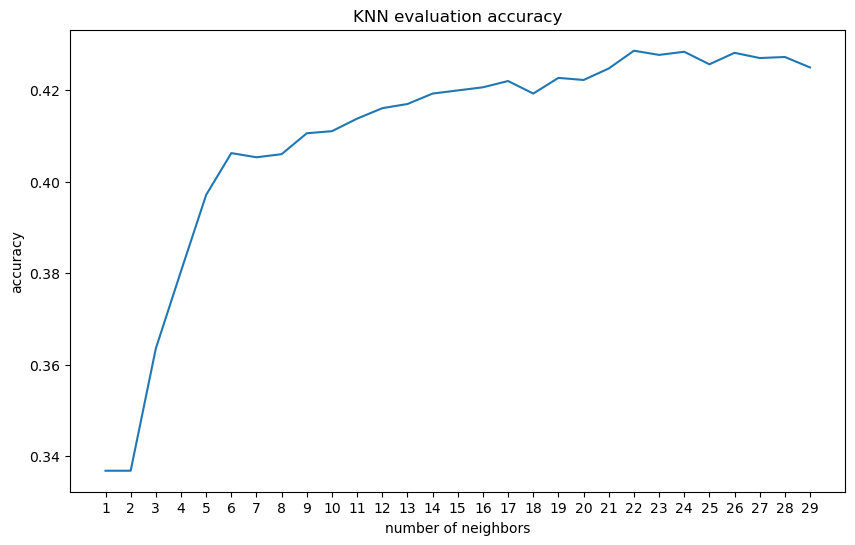

In [45]:
n_neighbors = range(1,30)
scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="cityblock", weights="distance")
    clf.fit(X_train_norm, y_train)
    scores.append(clf.score(X_val_norm, y_val))

plt.figure(figsize=(10, 6))
plt.plot(scores)
plt.title('KNN evaluation accuracy')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("number of neighbors")
plt.ylabel("accuracy")
#plt.savefig('Accuracy VAL 1-30.png')
plt.show()

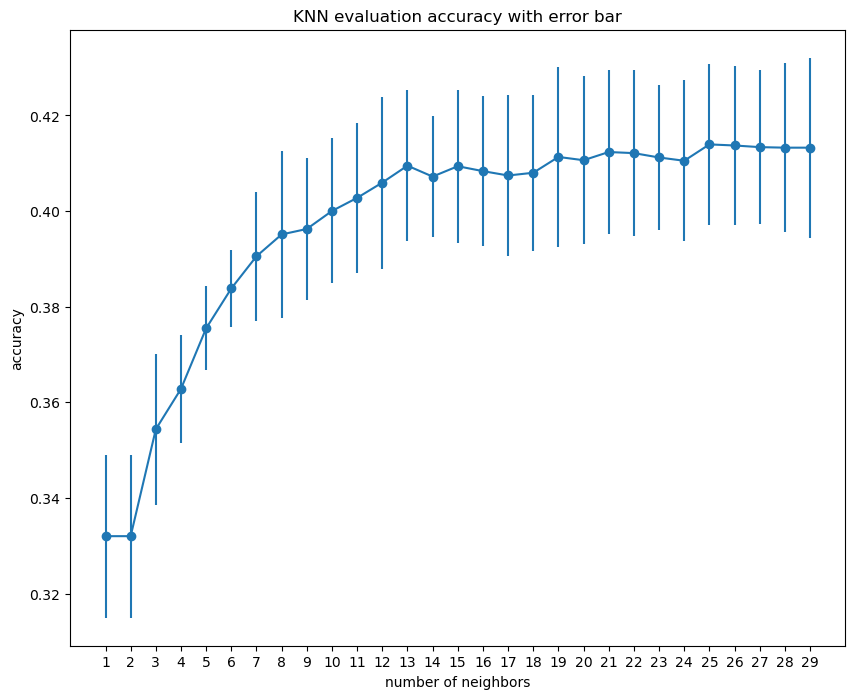

In [46]:
n_neighbors = range(1,30)
avg_scores = list()
std_scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="cityblock", weights="distance")
    scores = cross_val_score(clf, X_train_norm, y_train, cv=k)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

#plt.plot(avg_scores)
plt.figure(figsize=(10, 8))
plt.title('KNN evaluation accuracy with error bar')
plt.errorbar(range(len(n_neighbors)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("number of neighbors")
plt.ylabel("accuracy")
#plt.savefig('Error bar VAL 1-30.png')
plt.show()

In [47]:
clf = KNeighborsClassifier(n_neighbors=24, metric="cityblock", weights="distance")
clf.fit(X_train_norm, y_train)
y_val_pred = clf.predict(X_val_norm)
print("Accuracy:", accuracy_score(y_val, y_val_pred))

Accuracy: 0.42834322227293475


#### Grid Search

In [48]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

%%time
param_grid = {
    "n_neighbors": np.arange(1, X_train.shape[0]//2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"],
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    # verbose=2
)

grid.fit(X_train_norm, y_train)
clf = grid.best_estimator_

print(grid.best_params_, grid.best_score_)

y_val_pred = clf.predict(X_val_norm)
print("Accuracy:", accuracy_score(y_val, y_val_pred))

clf.score(X_val_norm, y_val)

## grid.cv_results_

results = pd.DataFrame(grid.cv_results_)
results

results["metric_weight"] = results["param_metric"] + ", " + results["param_weights"]

sns.lineplot(
    data=results, x="param_n_neighbors", y="mean_test_score", hue="metric_weight"
)